In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import models
from keras import layers
from keras.datasets import reuters

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [67]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [68]:
print(train_data.shape)

(8982,)


In [69]:
print(train_labels.shape)

(8982,)


In [70]:
print(test_data.shape)

(2246,)


In [71]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [72]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [73]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])
decoded_newswire

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

In [74]:
train_labels[10]

3

In [75]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results

In [76]:
x_train = vectorize_sequences(train_data)

In [77]:
x_test = vectorize_sequences(test_data)

In [78]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for idx, label in enumerate(labels):
        results[idx, label] = 1.
    return results

In [79]:
one_hot_train_labels = to_one_hot(train_labels, dimension=len(np.unique(train_labels)))
one_hot_test_labels = to_one_hot(test_labels, dimension=len(np.unique(train_labels)))

In [31]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [32]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [33]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [34]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 237us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 93us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 85us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 86us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

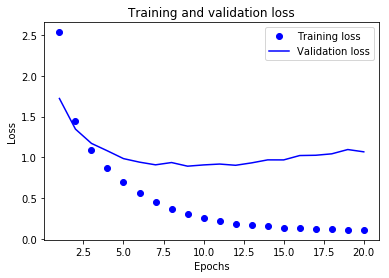

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [80]:
train_labels = np.array(train_labels)

In [81]:
train_labels.shape

(8982,)

In [82]:
x_train.shape

(8982, 10000)

In [83]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy']) 
model.fit(x_train, train_labels, epochs=9,batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 2s 183us/step - loss: 2.4410 - acc: 0.5245
Epoch 2/9
8982/8982 [==============================] - 1s 82us/step - loss: 1.3727 - acc: 0.7027
Epoch 3/9
8982/8982 [==============================] - 1s 79us/step - loss: 1.0472 - acc: 0.7745
Epoch 4/9
8982/8982 [==============================] - 1s 78us/step - loss: 0.8259 - acc: 0.8258
Epoch 5/9
8982/8982 [==============================] - 1s 78us/step - loss: 0.6563 - acc: 0.8612
Epoch 6/9
8982/8982 [==============================] - 1s 79us/step - loss: 0.5219 - acc: 0.8893
Epoch 7/9
8982/8982 [==============================] - 1s 78us/step - loss: 0.4251 - acc: 0.9115
Epoch 8/9
8982/8982 [==============================] - 1s 78us/step - loss: 0.3427 - acc: 0.9247
Epoch 9/9
8982/8982 [==============================] - 1s 78us/step - loss: 0.2851 - acc: 0.9356


In [44]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 69us/step


In [45]:
results

[1.023729873149393, 0.7756010686194165]

In [46]:
predictions = model.predict(x_test)

In [48]:
np.sum(predictions[0])

1.0000001

In [49]:
np.argmax(predictions[0])

3